# Neuro-Symbolic AI for Sample Efficiency
In this notebook we show some first results that Neuro-Symbolic AI (NeSy-AI) can be used to increase the sample efficiency of AI systems. For this purpose we use the DeepProbLog system as a NeSy approach and LeNet and a MLP as a baseline model for a pure neural based approach.

We use the MNIST dataset and the task is basically to compute the difference between two MNIST images. This means that the system gets two images (x1, x2) as an input. Therefore it has not only to learn to detect the number in the specific image, but also to build the difference (x2-x1) between both numbers.

For better comparability we pretrained a LeNet on the pure MNIST task, to detect the numbers out of the images. the weights of the pretrained LeNet are then frozen for the actual learning task. 

Im comparison to that the NeSy-AI (DeepProbLog) only got pairs of images (x1, x1) and the corresponding label (=difference of x2-x1) as training data, but no further information about what image contains what number. As background knowledge we provided the system how to build the difference. 

In [1]:
import os 
os.chdir('/app/dpl/')

Further information about the datasets can be found in `preprocessing.ipynb` in the `data` folder.
Here we just load the saved results to illustrate the final results of the experiments with both approaches.  

In [2]:
import pandas as pd
import numpy as np

# training of the mlp on reduced data
mlp_train = np.array(pd.read_csv(r'logs/MLP_train.csv'))
mlp_test = np.array(pd.read_csv(r'logs/MLP_test.csv'))

# training of mlp on full data
mlp_train_full = np.array(pd.read_csv(r'logs/MLP_train_full.csv'))
mlp_test_full = np.array(pd.read_csv(r'logs/MLP_test_full.csv'))

# training of DeepProbLog on reduced data
dpl_train = np.genfromtxt(r'logs/DPL_1comb_class_train.log', delimiter=',', skip_header=2)
dpl_test = np.array(pd.read_csv(r'logs/DPL_1comb_class_test.csv'))

We trained the MLP once on the full dataset (which consists of all possible combinations for every class) and on the reduced dataset,  (which consists of one possible combination for every class). Therefore the full training data comes with 59999 samples and the reduced training data with only 11530 samples. The test set consists of 1999 samples.

DeepProbLog was only trained on the reduced training set. This allows us to compare the results from DeepProbLog and the neural net not only for the reduced variant, but also to draw additional conclussions on how DeepProbLog performs on reduced data compared to an neural based approach which is trained on a full data. 

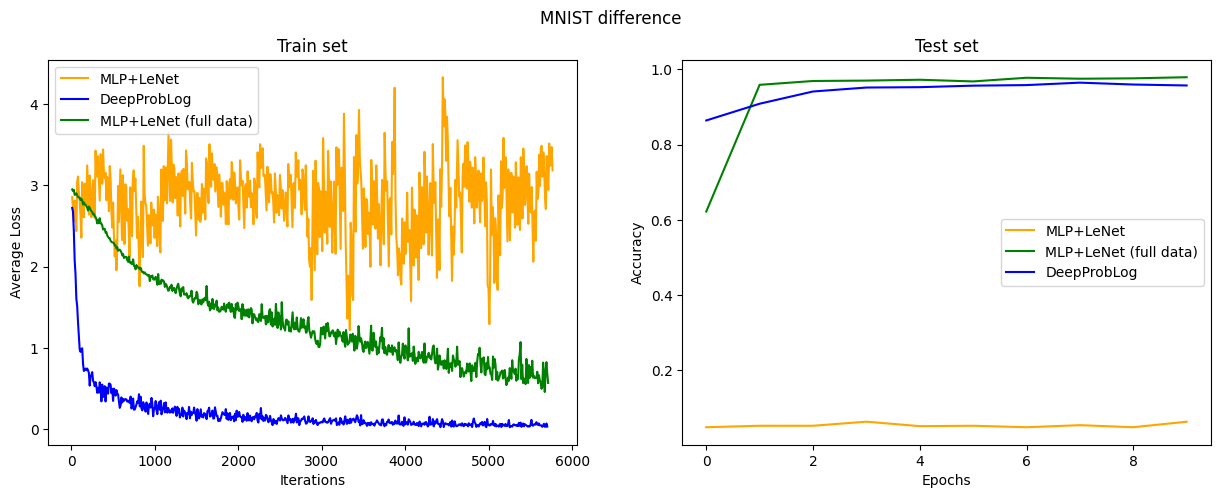

In [3]:
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(mlp_train[:,0], mlp_train[:,1], 'orange', label='MLP+LeNet')
ax1.plot(dpl_train[:570, 0], dpl_train[:570, 2], 'blue', label='DeepProbLog')
ax1.plot(mlp_train_full[:570,0], mlp_train_full[:570,1], 'green', label='MLP+LeNet (full data)')
ax1.title.set_text('Train set')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Average Loss')
ax1.legend()
ax2.plot(mlp_test[:,0], mlp_test[:,2], 'orange', label='MLP+LeNet')
ax2.plot(mlp_test_full[:,0], mlp_test_full[:,2], 'green', label='MLP+LeNet (full data)')
ax2.plot([i for i in range(len(mlp_test))], dpl_test[:570, 0], 'blue', label='DeepProbLog')
ax2.title.set_text('Test set')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
fig1.suptitle('MNIST difference')
ax2.legend()

As you can clearly see DeepProbLog is way more sample efficient than the neural based approach. As outlined in the `pre_processing` notebook, we reduced the number of possible combinations per class to 1 and therefore also reduced the overall number of training samples (from 59999 samples to 11530). This means that we only need a fraction of the training samples that we would need for a purely neural approach and can still achieve approximately the same results.